In [18]:
from PIL import Image
import torch

from posegen import config, baselines
from posegen.datasets.tesla import get_tesla_dataset
from posegen.datatypes import ObjectWithMask, Split

### helpers

In [10]:
def get_bl(key):
    return baselines.FromDiskShubham(
        ds=get_tesla_dataset(Split.test),
        ds_train=get_tesla_dataset(Split.test),
        path=paths[key],
        batch_size=32, num_workers=8, seed=0,
    )

paths = dict(
    ae='autoencoder_step_75000.npz',
    pose='pose_conditioned_step_75000.npz',
    car_and_pose='pose_appearance_conditioned_step_75000.npz',
    car_and_pose_and_background='pose_appearance_bgnd_conditioned_step_75000.npz',
)

def get_fake_image(key, path):
    n = np.load(paths[key])[path]
    p = get_bl('pose')
    return ObjectWithMask.from_tensor(torch.tensor(n), p.tensor_to_pil_fn).object_image_frame

def show(key, path):
    plt.imshow(Image.open(f'/data/PoseGen_resized/cars/tesla-model-3-midnight-silver/{path}'))
    plt.show()
    plt.imshow(get_fake_image(key, path))

In [36]:
df = pd.read_csv('error-analysis-all.csv')

### Loss function
Full image reconstruction vs. pose-masked

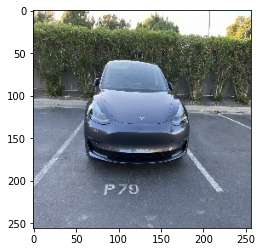

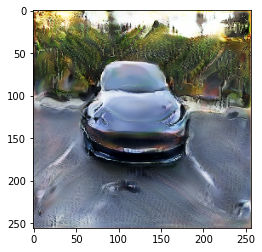

In [134]:
show('pose', 'avana-sunnyvale/IMG_0533.JPEG')

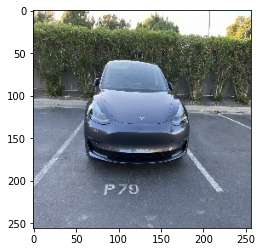

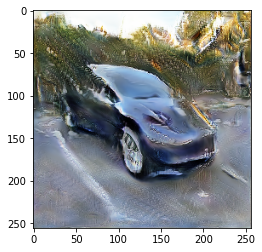

In [135]:
show('ae', 'avana-sunnyvale/IMG_0533.JPEG')

### Examples

In [136]:
# IoU=0.91, Isim=0.82
# ok example
# show('pose', 'avana-sunnyvale/IMG_0586.JPEG')

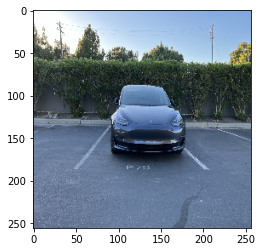

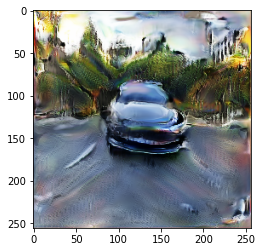

In [60]:
# good pose match (iou), bad Isim
# IoU = 0.88, Isim = 0.59
show('pose', 'avana-sunnyvale/IMG_0703.JPEG')

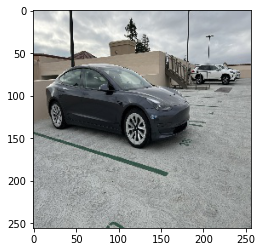

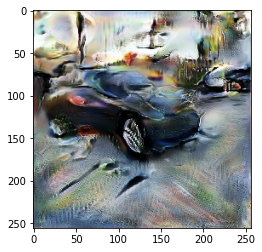

In [69]:
# Isim=0.58, IoU=0
# very bad Isim => bad IoU
show('pose', 'santa-clara-square-rooftop/IMG_2558.JPEG')

### Isim and IoU association

In [98]:
import seaborn as sns

In [142]:
def scatter(key, title, fancy=True):
    # df.plot.scatter(x=f'iou_{key}', y=f'isim_{key}')
    x, y = f'iou_{key}', f'isim_{key}'
    x_label, y_label = 'IoU', '$I_{sim}$'
    if fancy:
        h = sns.jointplot(df[x], df[y], kind='reg')
        h.set_axis_labels('x', 'y')
        h.ax_joint.set_xlabel(x_label)
        h.ax_joint.set_ylabel(y_label)
    else:
        sns.regplot(x, y, data=df)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
    plt.xlim([-.05, 1])
    plt.ylim([-.05, 1])
    plt.title(title)

/apps/python3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


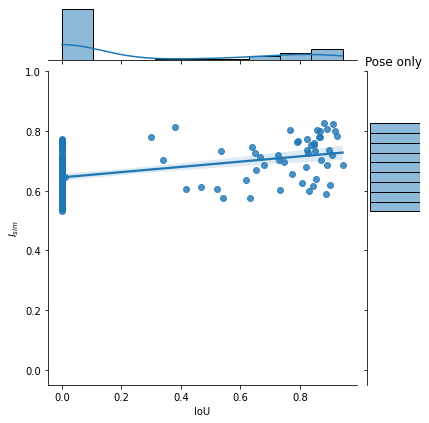

In [143]:
scatter('pose', 'Pose only')

/apps/python3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


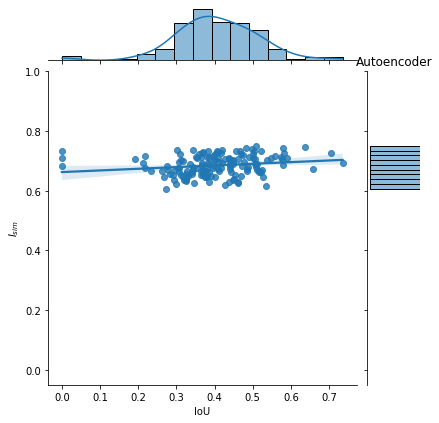

In [144]:
scatter('ae', 'Autoencoder')

### non fancy

/apps/python3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


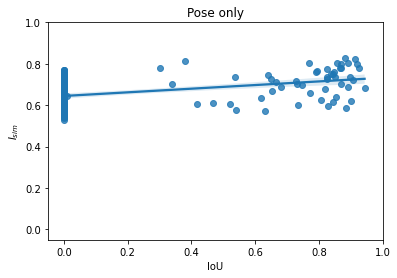

In [145]:
scatter('pose', 'Pose only', fancy=False)

/apps/python3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


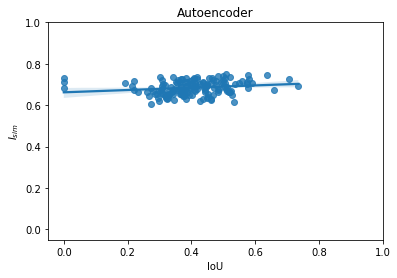

In [146]:
scatter('ae', 'Autoencoder', fancy=False)